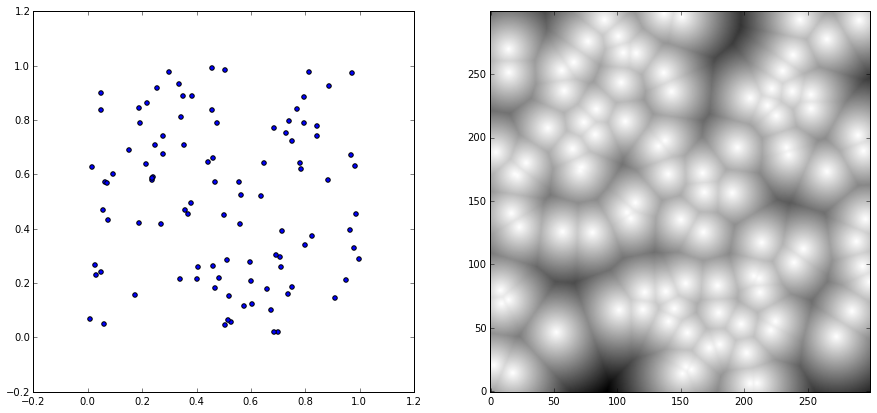

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from scipy.spatial import cKDTree

n = 100
pts = np.random.uniform(size=(n,2))
kdt = cKDTree(pts)

res=300
I = np.linspace(0,1,res)
x, y = np.meshgrid(I,I)

grid = np.vstack((x.ravel(), y.ravel())).T
d, _ = kdt.query(grid)
D = d.reshape((res,res))

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,15))

ax1.scatter(pts[:,0],pts[:,1])
ax1.set_aspect('equal')
ax2.imshow((1-D)**2,origin='lower',cmap='gray')

In [2]:
import numpy as np
from scipy.spatial import cKDTree, Delaunay, delaunay_plot_2d

pts = np.random.normal(size=(1,2))
    
def next_point(pts, distance=1.):
    kdt = cKDTree(pts)
    def cost_function(pt):
        if np.sqrt(np.sum(pt**2)) > distance * 12:
            return distance
        d, _ = kdt.query(pt)
        return np.abs(d-distance)
    for _ in range(1000):
        start = pts[np.random.choice(pts.shape[0]),:]
        theta = np.random.random() * 2 * np.pi
        disp = np.array([np.sin(theta), np.cos(theta)]) * distance
        new_pt = start + disp
        c = cost_function(new_pt)
        if c < distance / 20.:
            return new_pt
    return None

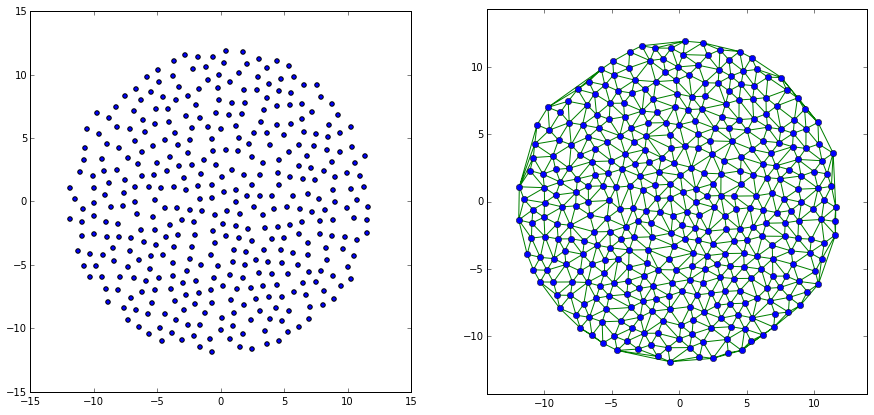

In [5]:
n = 500

pts = np.random.normal(size=(1,2))
distance = 1
for i in range(n):
    new_pt = next_point(pts, distance)
    if new_pt is None:
        break
    pts = np.vstack((pts,new_pt))

delaunay = Delaunay(pts)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,15))

ax1.scatter(pts[:,0],pts[:,1])
ax1.set_aspect('equal')
ax2.set_aspect('equal')
delaunay_plot_2d(delaunay, ax2)
None

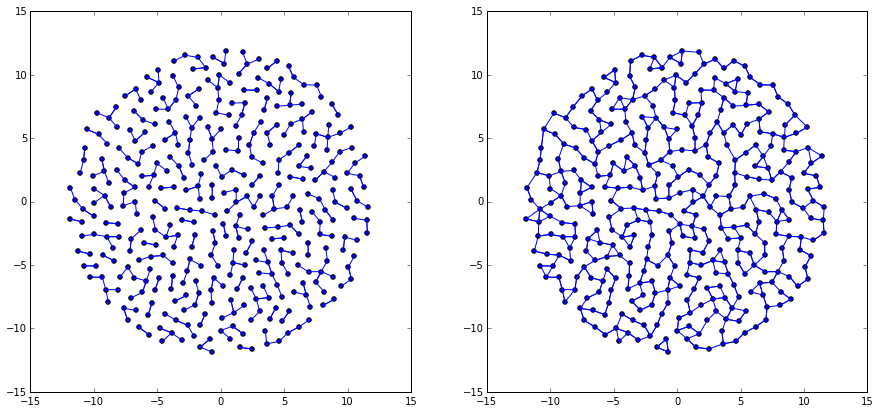

In [6]:
kdt = cKDTree(pts)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,15))

ax1.scatter(pts[:,0],pts[:,1])
ax1.set_aspect('equal')

ax2.scatter(pts[:,0],pts[:,1])
ax2.set_aspect('equal')

def plt_knn(pts,ax,k=2):
    _, ix = kdt.query(pts,k=k+1)
    knn_segs = pts[ix.ravel()].reshape(pts.shape[0],k+1,2)
    for seg in knn_segs:
        for nn in seg[1:]:
            ax.plot([seg[0,0],nn[0]],[seg[0,1],nn[1]],color='blue')

plt_knn(pts,ax1,k=1)
plt_knn(pts,ax2,k=2)